In [1]:
#import bibliotek
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# pobrać plik i przekonwertować go na DataFrame
apartments = pd.read_csv('AB_NYC_2019.csv')
apartments = apartments.sample(frac = 1)
apartments.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5825,4248788,W70s Lg. Studio with outdoor space,22047286,Chloe,Manhattan,Upper West Side,40.77881,-73.97726,Entire home/apt,250,2,5,2015-11-27,0.11,1,0
5899,4296956,Sharbell’s vacation,22307859,Sharon,Brooklyn,Canarsie,40.63621,-73.89407,Entire home/apt,210,3,11,2019-07-07,2.75,5,83
5813,4236107,nice apt in west village,14729523,Zherui,Manhattan,West Village,40.73408,-74.00570,Private room,110,1,0,NaN,NaN,1,0
37458,29724480,J-NEW ROOM*NEAR CASINO*AIRPORT*CAFE*DOORSTEP M...,213208277,Darry,Queens,South Ozone Park,40.67280,-73.79495,Private room,59,4,2,2019-05-17,0.33,8,365
29430,22576120,"Cozy, Glamorous: A Hide-away Seaside Private Room",162430220,Raymond,Queens,College Point,40.77639,-73.84392,Private room,80,1,0,NaN,NaN,1,0


In [2]:
# statyczna analiza danych matematycznych
print(apartments.describe(), end = "\n\n")
print(apartments.info(), end = "\n\n")
print(apartments.isnull().values.any(), end =  "\n\n")

apartments

                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.00

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5825,4248788,W70s Lg. Studio with outdoor space,22047286,Chloe,Manhattan,Upper West Side,40.77881,-73.97726,Entire home/apt,250,2,5,2015-11-27,0.11,1,0
5899,4296956,Sharbell’s vacation,22307859,Sharon,Brooklyn,Canarsie,40.63621,-73.89407,Entire home/apt,210,3,11,2019-07-07,2.75,5,83
5813,4236107,nice apt in west village,14729523,Zherui,Manhattan,West Village,40.73408,-74.00570,Private room,110,1,0,NaN,NaN,1,0
37458,29724480,J-NEW ROOM*NEAR CASINO*AIRPORT*CAFE*DOORSTEP M...,213208277,Darry,Queens,South Ozone Park,40.67280,-73.79495,Private room,59,4,2,2019-05-17,0.33,8,365
29430,22576120,"Cozy, Glamorous: A Hide-away Seaside Private Room",162430220,Raymond,Queens,College Point,40.77639,-73.84392,Private room,80,1,0,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40737,31620173,"Williamsburg 1.5 Bed, PRIVATE Yard, Music Venues",237049868,Luc And Deb,Brooklyn,Williamsburg,40.71364,-73.93830,Entire home/apt,95,1,2,2019-05-06,0.56,1,0
44022,33995764,Private Master Suite.,5547103,Artur,Bronx,Parkchester,40.83530,-73.85751,Private room,75,3,0,NaN,NaN,1,81
39202,30567265,A gem in Bushwick,61107296,Jessica,Queens,Ridgewood,40.70732,-73.91491,Private room,65,1,3,2019-01-02,0.47,1,0
24775,19891485,Cozy and Charming Private Room in Lower East Side,10677720,Deniz,Manhattan,Lower East Side,40.71770,-73.98245,Private room,77,5,20,2018-05-13,0.84,1,0


In [3]:

#zastosować "one hot encoding" i połączyć wyniki
apartments_encoded_neighbourhood_group = pd.get_dummies(apartments['neighbourhood_group'])
apartments = pd.merge(
    left=apartments,
    right=apartments_encoded_neighbourhood_group,
    left_index=True,
    right_index=True,
)

apartments_encoded_room_type = pd.get_dummies(apartments['room_type'])
apartments = pd.merge(
    left=apartments,
    right=apartments_encoded_room_type,
    left_index=True,
    right_index=True,
)
print(apartments.head())

             id                                               name    host_id  \
5825    4248788                 W70s Lg. Studio with outdoor space   22047286   
5899    4296956                                Sharbell’s vacation   22307859   
5813    4236107                           nice apt in west village   14729523   
37458  29724480  J-NEW ROOM*NEAR CASINO*AIRPORT*CAFE*DOORSTEP M...  213208277   
29430  22576120  Cozy, Glamorous: A Hide-away Seaside Private Room  162430220   

      host_name neighbourhood_group     neighbourhood  latitude  longitude  \
5825      Chloe           Manhattan   Upper West Side  40.77881  -73.97726   
5899     Sharon            Brooklyn          Canarsie  40.63621  -73.89407   
5813     Zherui           Manhattan      West Village  40.73408  -74.00570   
37458     Darry              Queens  South Ozone Park  40.67280  -73.79495   
29430   Raymond              Queens     College Point  40.77639  -73.84392   

             room_type  price  ...  calculat

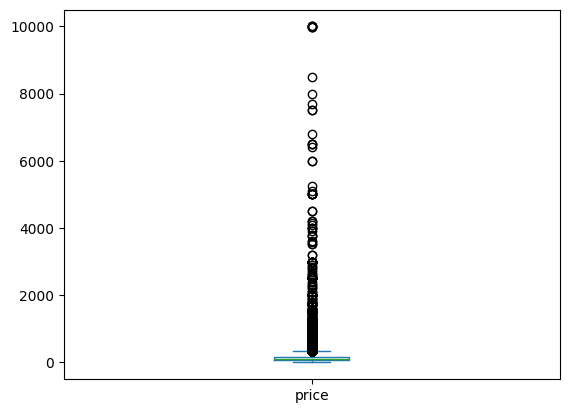

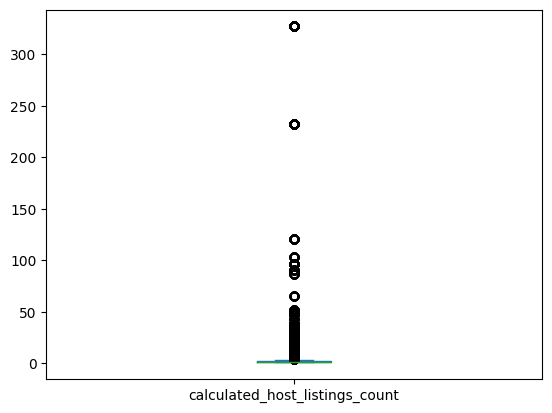

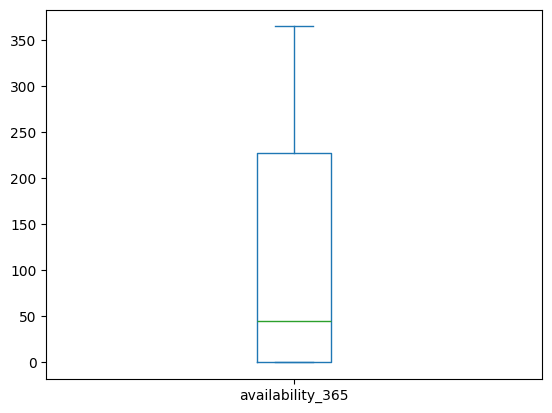

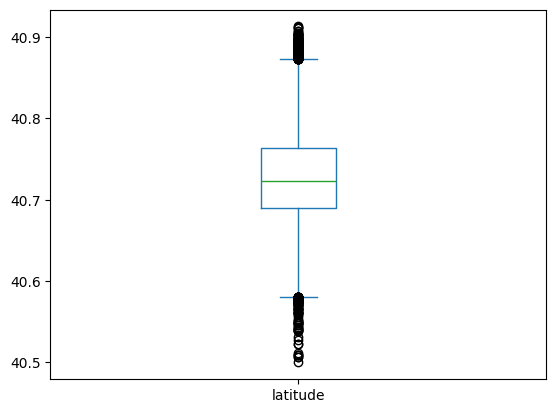

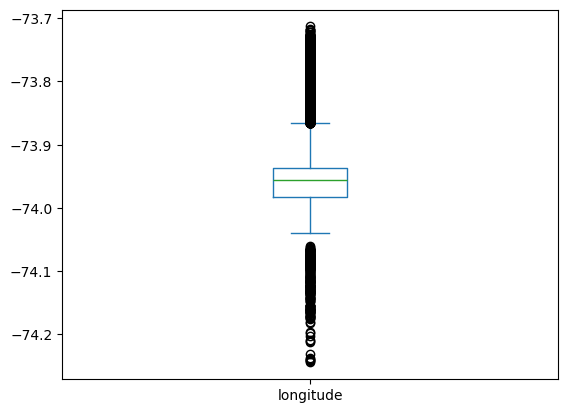

In [4]:
# rozkład danych na wykresach pudełkowych
apartments['price'].plot(kind='box')
plt.show()
apartments['calculated_host_listings_count'].plot(kind='box')
plt.show()
apartments['availability_365'].plot(kind='box') 
plt.show()
apartments['latitude'].plot(kind='box') 
plt.show()
apartments['longitude'].plot(kind='box')
plt.show()

In [5]:
# Usunięto niepotrzebne kolumny
columns_to_drop = ['id', 'name', 'host_id', 'host_name', 'last_review', 'reviews_per_month', 'neighbourhood', 'neighbourhood_group', 'room_type']
apartments = apartments.drop(columns=columns_to_drop)
apartments = apartments.dropna(axis=0, how='any')

apartments.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
5825,40.77881,-73.97726,250,2,5,1,0,False,False,True,False,False,True,False,False
5899,40.63621,-73.89407,210,3,11,5,83,False,True,False,False,False,True,False,False
5813,40.73408,-74.00570,110,1,0,1,0,False,False,True,False,False,False,True,False
37458,40.67280,-73.79495,59,4,2,8,365,False,False,False,True,False,False,True,False
29430,40.77639,-73.84392,80,1,0,1,0,False,False,False,True,False,False,True,False


In [6]:
#Wyrzucamy apartamenty, w których przez rok nie ma ani jednego wolnego miejsca
apartments = apartments.drop(apartments[apartments.availability_365 == 0].index)

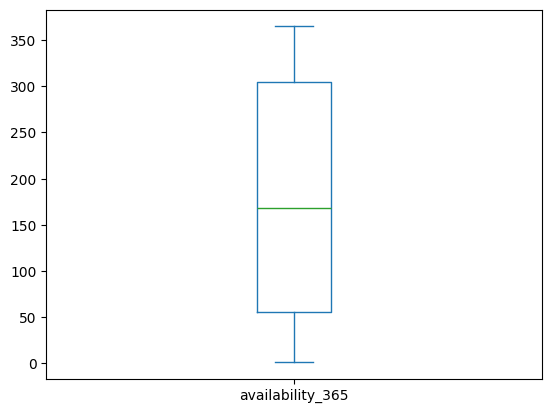

In [7]:
apartments['availability_365'].plot(kind='box')
plt.show()

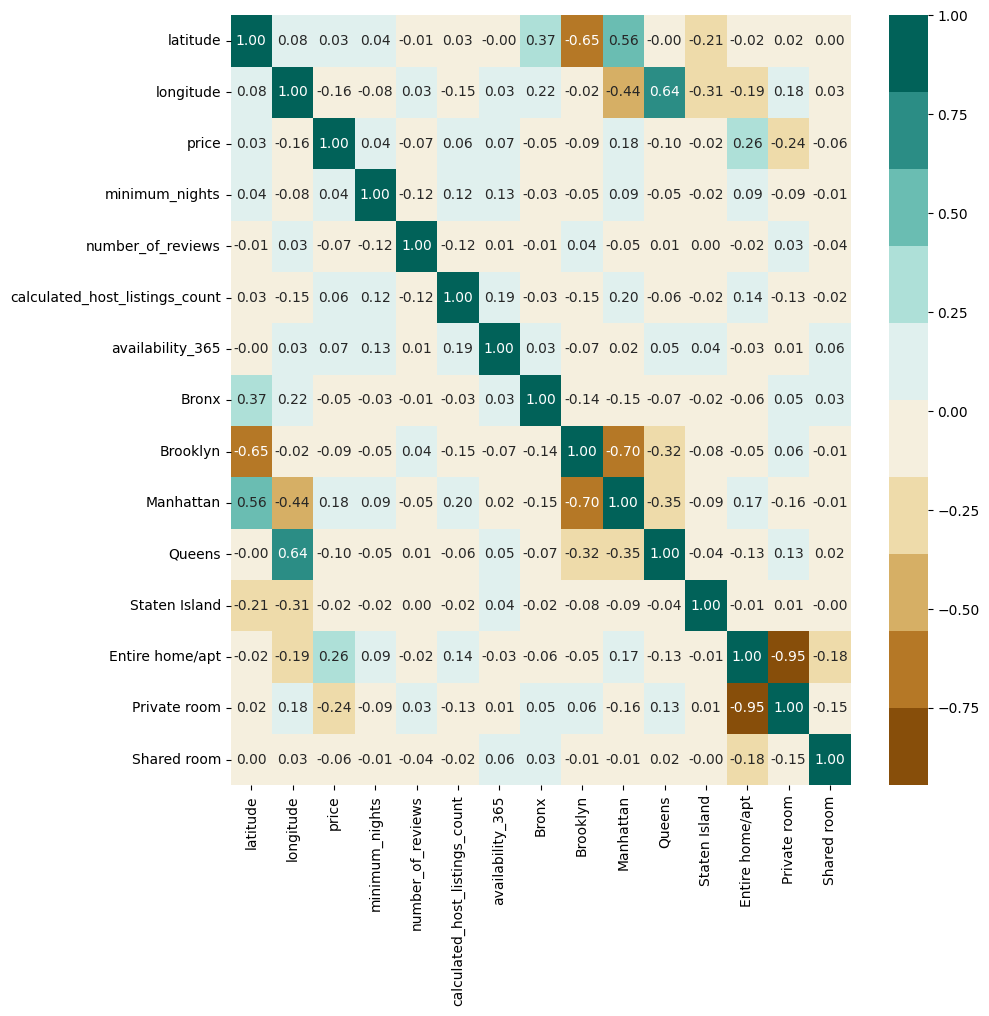

In [8]:
# macierz korelacji

correlations = apartments.corr()
fig, ax = plt.subplots(figsize=(10, 10))

colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlations, 
    cmap=colormap, 
    annot=True, 
    fmt=".2f")

plt.show()

In [9]:
# Prepare training set (all data without labels)
X = apartments.drop('price', axis=1).to_numpy()
X

array([[40.63621, -73.89407, 3, ..., True, False, False],
       [40.6728, -73.79495, 4, ..., False, True, False],
       [40.70372, -73.9067, 2, ..., True, False, False],
       ...,
       [40.78953, -73.9432, 1, ..., False, True, False],
       [40.8353, -73.85751, 3, ..., False, True, False],
       [40.68023, -73.91047, 2, ..., True, False, False]], dtype=object)

In [10]:
# Prepare labels for training set
y = apartments.loc[:, 'price'].to_numpy()
y

array([210,  59, 200, ...,  65,  75, 189], dtype=int64)

In [11]:
# Przygotowanie testowych i treningowych zestawów danych
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345) 

In [12]:
# wspólna metoda szkolenia i oceny dla obu modeli 

def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # train model
    classifier.fit(feature_vector_train, label)
    
    with open('prediaction_model.pickle', 'wb') as handle:
        pickle.dump(classifier, handle)
    
    # generate predictions
    predictions = classifier.predict(feature_vector_valid)
    
    # evalueate model
    score_vals = [
        metrics.mean_squared_error(predictions, y_test, squared=False),
        metrics.mean_absolute_error(predictions, y_test)
    ]
    return score_vals

In [13]:
# MODEL 1 - Linear regression
accuracy = train_model(linear_model.LinearRegression(), X_train, y_train, X_test)
accuracy_compare = {'LR': accuracy}
print ("LR: ", accuracy)

# MODEL 2 - RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
accuracy = train_model(regressor, X_train, y_train, X_test)
accuracy_compare['random forrest tree'] = accuracy
print ('random forrest tree' , accuracy)

LR:  [253.63084276238783, 80.3703895357618]
random forrest tree [231.9086608104305, 69.83740634465168]


<Axes: >

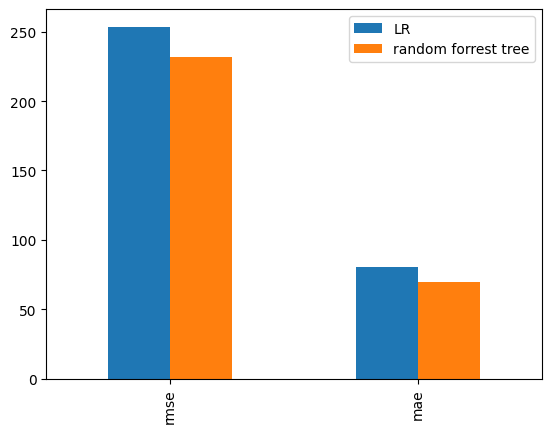

In [14]:
# Porównanie modeli

df_compare = pd.DataFrame(accuracy_compare, index = ['rmse', 'mae'])
df_compare.plot(kind='bar')

In [15]:
# Ustawianie parametrów w celu sprawdzenia wyniku
regressor.predict([[40.75695,-73.97988,30,0,87,332,False,False,True,False,False,True,False,False]]) #279

array([256.08])

In [16]:
# Dostosowanie parametrów modelu

# MODEL 3 - RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
accuracy = train_model(regressor, X_train, y_train, X_test)
accuracy_compare['random forrest tree'] = accuracy
print ('random forrest tree' , accuracy)

random forrest tree [231.8985917763253, 69.35238854349328]
